# Train a Tissue Classifier on GTEx

This notebook trains a tissue classifer, step-by-step, resulting in a saved model that can be reused for solving similar problems[1]. The steps outlined are:
* retrieve the GTEx data
* transform the data
* train and save the model
Alternatively, download the weights from this repo to avoid the computational expense of training.

Note: to reuse the weights, take care that the new dataset's features/genes are identical to the trained model described here. To use a different gene set, adjust the preprocessing step below to match the desired gene set. 

## Retrieve the data
The following command will create a `dist` directory for the raw gene counts and sample annotations. The GTEx data are retrieved from storage.googleapis.com and may "time out" several times before connecting to a viable google server. Plan accordingly and be patient, it may take 30-60 minutes or so, depending on how quickly you estable a connection with the server and internet bandwidth.

In [1]:
! ./get_gtex.sh

~/toys/tiscla/src/dist/gtex ~/toys/tiscla/src
--2022-07-22 16:25:54--  https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 198.41.0.4, 199.9.14.201, 192.33.4.12, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|198.41.0.4|:443... failed: Connection timed out.
Connecting to storage.googleapis.com (storage.googleapis.com)|199.9.14.201|:443... failed: Connection timed out.
Connecting to storage.googleapis.com (storage.googleapis.com)|192.33.4.12|:443... failed: No route to host.
Connecting to storage.googleapis.com (storage.googleapis.com)|199.7.91.13|:443... failed: No route to host.
Connecting to storage.googleapis.com (storage.googleapis.com)|192.203.230.10|:443... failed: Connection timed out.
Connecting to storage.googleapis.com (storage.googleapis.com)|192.5.5.241|:443... failed: Connection timed out.
Connecting to storage.googleapis.com (storage.

## Preprocess, save the gene matrix
The following command will read in the counts and annotations, read entrez gene id annotations directly from cognoma, and then wrangle the data into a format appropriate for the classification model. If training a model for a different geneset, please refer to the code in `gtex-preprocess.py` for details on how the data are processed and make changes accordingly.

In [24]:
! python gtex-preprocess.py

+ This will take about 10 minutes with a power laptop, but requires a lot of memory for doing a groupby median on the gene expression
+ Results in annotated geneset that is compatible with other datasets, like TCGA and TARGET
+ First run: 
  get_gtex.sh

+ Read gene expression - this takes a little while
+ Get GTEx gene mapping
+ Perform inner merge gene df to get ensembl to entrez mapping
+ Save map, expression dataframes
+ *Drop 'Name' column...
+ *Drop any rows with 'na's...
+ * Use groupby to collapse duplicate genes by median (199 genes are duplicated, some more than twice, for a total of 1608 values) ...
+ *reindex map...
+ *rename...
+ *rename again...
+ *transpose...
+ *sort by row...
+ *sort by columns...
+ rename index
+ write expr one more time
+ Write out gene ids in order (data/gtex/gene_ids.txt)
+ Write out superclass names
++ Change attr tissue type names to something directory-friendly
/home/krobasky/toys/tiscla/src/gtex-preprocess.py:113: FutureWarning: The default val

## Train the model
Run the following command to train the tissue classifier on GTEx data, perform rudimentary performance evaluation, and save the architecture and weights. As configured, the model will drop any tissues without at least 100 samples, and will only train on 200*(tissue classes) samples. Please refer to the code to make appropriate modifications as desired.

Best to run this on a GPU. Google Colab is a good choice, sans access to an on-premisis GPU server.

In [25]:
! python gtex-train.py

Drop under-represented classes with less than 100 samples:
dropped Kidney
dropped Cervix Uteri
dropped Fallopian Tube
dropped Bladder
Counts per class:
(total number of samples, total number of genes) = 
(17244, 18966)
[ 0] Adipose Tissue	1204 samples
[ 1] Muscle      	 803 samples
[ 2] Blood Vessel	1335 samples
[ 3] Heart       	 861 samples
[ 4] Uterus      	 142 samples
[ 5] Vagina      	 156 samples
[ 6] Breast      	 459 samples
[ 7] Skin        	1809 samples
[ 8] Salivary Gland	 162 samples
[ 9] Brain       	2642 samples
[10] Adrenal Gland	 258 samples
[11] Thyroid     	 653 samples
[12] Lung        	 578 samples
[13] Spleen      	 241 samples
[14] Pancreas    	 328 samples
[15] Esophagus   	1445 samples
[16] Stomach     	 359 samples
[17] Colon       	 779 samples
[18] Small Intestine	 187 samples
[19] Prostate    	 245 samples
[20] Testis      	 361 samples
[21] Nerve       	 619 samples
[22] Blood       	 929 samples
[23] Pituitary   	 283 samples
[24] Ovary       	 180 sample

Look at the loss curve that was output to file by the training pipeline. Accuracy (orange) should swiftly increase with each epoch and remain high while loss should swiftly decrease and remain low.

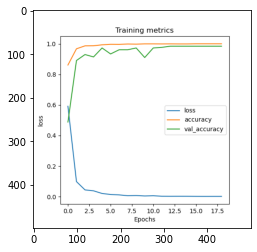

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("data/images/nn-loss-curve.png")
plt.imshow(img);